**Data Pre-Processing in Excel**

Extracted Month_Number,Week_Number and corresponding Weekly_total from the extracted excel sheet of Daily basis chat

In [ ]:
#importing pandas and numpy
import pandas as pd
import numpy as np

**1. Uploading Excel sheets**

In [ ]:
from google.colab import files
chat_data_weekly=files.upload()

Saving Chat_Weekly_Data.xlsx to Chat_Weekly_Data.xlsx


**2. Reading files with Pandas**

In [ ]:
import io
df=pd.read_excel(io.BytesIO(chat_data_weekly['Chat_Weekly_Data.xlsx']))
df

,Month_Number,Week_Number,Weekly_Total
0,2,1,2129
1,2,2,1739
2,2,3,1843
3,2,4,2459
4,3,1,2803
5,3,2,2243
6,3,3,1990
7,3,4,2152
8,3,5,2066


Now we should analyse our dataset.

We will import **seaborn library to plot a boxplot** which will describe to us about **outliers**.

*Checking for the Outliers is important step which will help us in deciding best evaluation metrics.*

If there are **outliers MAE is the best metric to evaluate errors**.

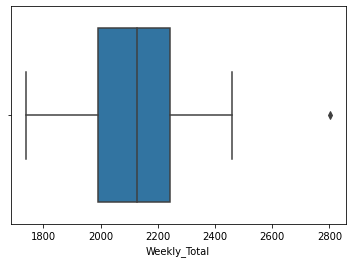

In [ ]:
import seaborn as sns
sns.boxplot(x = df["Weekly_Total"])

**No Validation** because dataset is very much small
Only Train/Test Set

**Test Set size is 50% to avoid overfiting** which is caused due to small dataset

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(df.drop('Weekly_Total',axis = 1),df['Weekly_Total'],test_size = 0.5,random_state = 1)

Because our dataset is very small it is prone to OVERFITTING, therefore we will not use R-squared

because of outliers Mean Absolute Error is best method

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(n_estimators= 1000 , max_depth=20 , n_jobs=-1 , random_state= 1)

# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

rfr.fit(X_train , y_train)

import numpy as np

mae_train = mean_absolute_error((y_train) ,(rfr.predict(X_train)))
mae_test = mean_absolute_error((y_test) , (rfr.predict(X_test)))
mse_train = mean_squared_error((y_train) ,(rfr.predict(X_train)))
mse_test = mean_squared_error((y_test) , (rfr.predict(X_test)))
rmse_train = np.sqrt(mean_squared_error((y_train) ,(rfr.predict(X_train))))
rmse_test = np.sqrt(mean_squared_error((y_test) , (rfr.predict(X_test))))
R_score_train = r2_score((y_train) , (rfr.predict(X_train)))
R_score_test = r2_score((y_test) , (rfr.predict(X_test)))

print("ACCURACY : ")
print("Because our dataset is very small it is prone to OVERFITTING, therefore we will not use R-squared")
print("because of outliers Mean Absolute Error is best method")
print("Mean Absolute Error Training Set")
print(mae_train)
print("Mean Absolute Error Test Set")
print(mae_test)

# print("Higher the value greater the accuracy")
# print("R2 Score Training Set")
# print(R_score_train)
# print("R2 Score Test Set")
# print(R_score_test)
print("")
print("")
print("")

print("Root Mean Squared Error Training Set")
print(rmse_train)
print("Root Mean Squared Error Test Set")
print(rmse_test)

print("Mean Squared Error Training Set")
print(mse_train)
print("Mean Squared Error Test Set")
print(mse_test)


ACCURACY : 
Because our dataset is very small it is prone to OVERFITTING, therefore we will not use R-squared
because of outliers Mean Absolute Error is best method
Mean Absolute Error Training Set
145.745
Mean Absolute Error Test Set
394.4832



Root Mean Squared Error Training Set
150.25564924487867
Root Mean Squared Error Test Set
400.7575434279435
Mean Squared Error Training Set
22576.760130000006
Mean Squared Error Test Set
160606.60861440003


# Calculating Number of Engineers required

Lets Predict data for **Month_Number 4** and **Week_Number 2**

In [ ]:
rfr.predict([[4 , 2] , ])

array([2369.848])

## Further Processing

The model predicts the number of chats.



In [ ]:
number_of_chats=2369.848

Average Handling Time of chat is given 23 minutes.

Engineers works for 7 hours 30 minutes (= 450 minutes) per day. 

So, they will work for 2250 minutes(= 450 minutes * 5days) per week.

The number of minutes workers are required per week = the number of chats * Average Handling Time of chat

Thus, the number of resourses required = (The number of minutes workers are required) / (Number of minutes each workers works per week)

In [ ]:
number_of_resourses_required=(number_of_chats)*23/2250
number_of_resourses_required

24.22511288888889

#*`25 Engineers required on Week 2 and month 4 to handle Chats.`*